In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')

In [3]:
from importlib import reload

import numpy as np
import tensorflow as tf
import logging
from scipy import linalg

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable

import dev_ori_sel_RF
from dev_ori_sel_RF import data_dir,integrator_tf,dynamics,network,run_onelayer,probe_RFs
from dev_ori_sel_RF.tools import misc,update_params_dict#,analysis_tools

In [6]:
reload(misc)

config_dict = misc.load_external_params("params_test")

N4 = config_dict["N4"]
Nlgn = config_dict["Nlgn"]
Nret = config_dict["Nret"]
Nlgnpop = 2
N4pop = config_dict["num_lgn_paths"] // Nlgnpop

MISC params_dict params_test {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_eccentricity': 0

In [7]:
reload(run_onelayer)
reload(integrator_tf)
Version = 0
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
# of stimuli: 16
mode in get_RFs initialize
CHECK radius 0.15
CHECK radius 0.15
mode in get_RFs initialize
CHECK radius 0.15
CHECK radius 0.15
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

W4to4 (800, 800)
Starting simulation. This might take a while...
...
max_freq 4.2 0.23809523809523808 1.4959965017094252
self.weight_strength 1.0
self.weight_strength 1.0
Number of plasticity steps: 32
lgn (4, 400) tf.Tensor(4.525697, shape=(), dtype=float32)

Plasticity step: 0, exp: 0, input: 0
Comment out next line if ru

Comment out next line if running with antolik_etal settings
L4 23 2.2334404e-37 74.45617 0 0
key dW_lgn_e 23 0.0 2.2930586
key dW_lgn_i 23 0.04212106 1.7455683
CHECK SHAPE2 (320000,)
H1 (2, 400)
0.9 of ff weights are frozen at t=0, exit integration!
lgn (4, 400) tf.Tensor(5.2187767, shape=(), dtype=float32)

Plasticity step: 24, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 24 2.2343619e-37 71.50049 0 0
key dW_lgn_e 24 0.0 2.1939437
key dW_lgn_i 24 0.06964323 1.6774083
CHECK SHAPE2 (320000,)
H1 (2, 400)
0.9 of ff weights are frozen at t=0, exit integration!
lgn (4, 400) tf.Tensor(4.9071965, shape=(), dtype=float32)

Plasticity step: 25, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 25 2.233548e-37 73.65492 0 0
key dW_lgn_e 25 0.0 2.2611206
key dW_lgn_i 25 0.08395608 1.7192212
CHECK SHAPE2 (320000,)
H1 (2, 400)
0.9 of ff weights are frozen at t=0, exit integration!
lgn (4, 400) tf.Tensor(5.315908, shape=(), dtype=float3

In [4]:
def imshowbar(ax,A,**kwargs):
    ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    plot = ax.imshow(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot, cax=cax, orientation='vertical')
    
def contourbar(ax,A,**kwargs):
    ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    plot = ax.contour(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot, cax=cax, orientation='vertical')
    
def doubcontbar(ax,A1,A2,**kwargs):
    ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    plot1 = ax.contour(A1,**kwargs)
    plot2 = ax.contour(A2,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot1, cax=cax, orientation='vertical')

['W', 'l4']
(2, 2, 20, 20, 20, 20)
(2, 20, 20)
(400, 400)


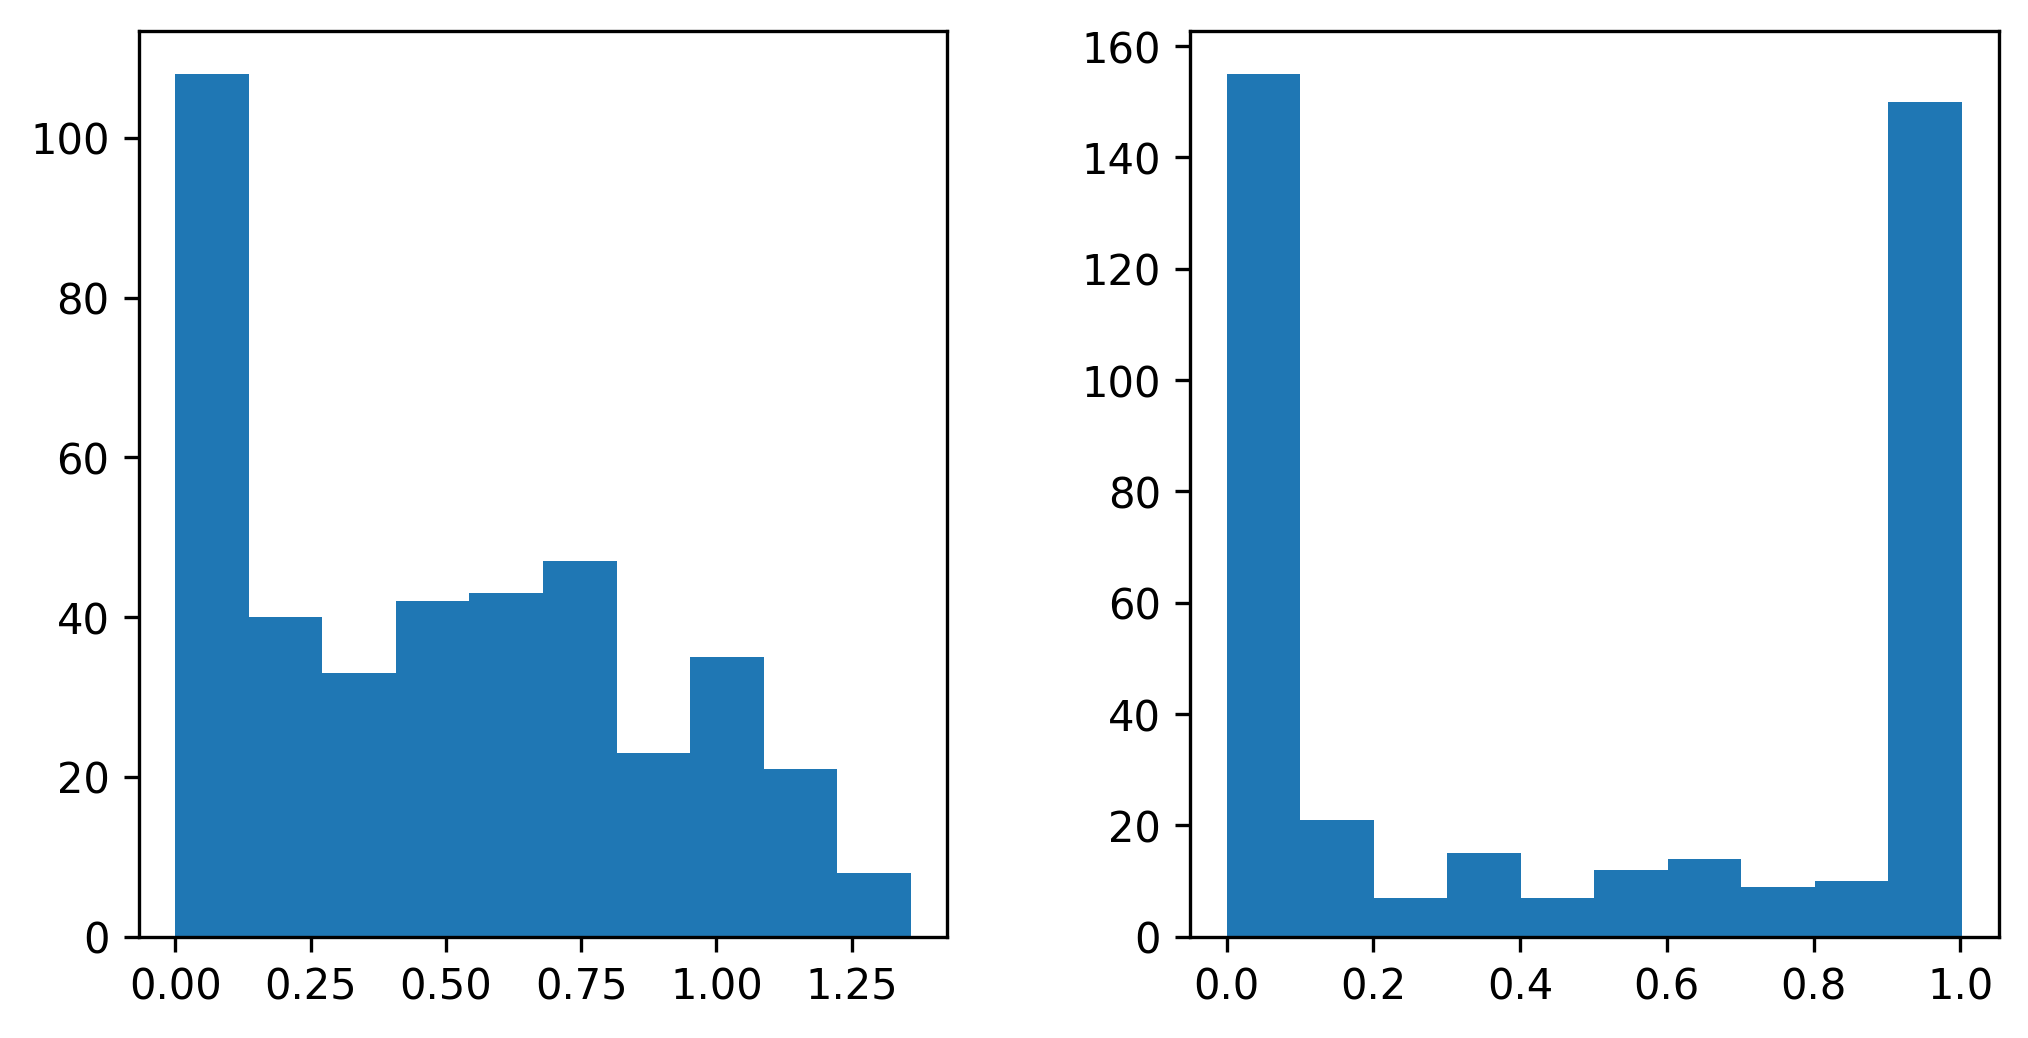

In [9]:
with np.load(data_dir+'/layer4/v{v}/y_v{v}.npz'.format(v=Version)) as data:
    print(list(data.keys()))
    print(data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4).shape)
    print(data['l4'].reshape(N4pop,N4,N4).shape)
    print(data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4)[0,0].reshape(400,400).shape)
    
    fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
    fig.subplots_adjust(hspace = .1, wspace=.3)
    
    axs[0].hist(data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4)[0,0].reshape(400,400).sum(-1))
    axs[1].hist(data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4)[0,0].reshape(400,400).sum(0))

['W', 'l4']
(2, 2, 20, 20, 20, 20)
(2, 20, 20)


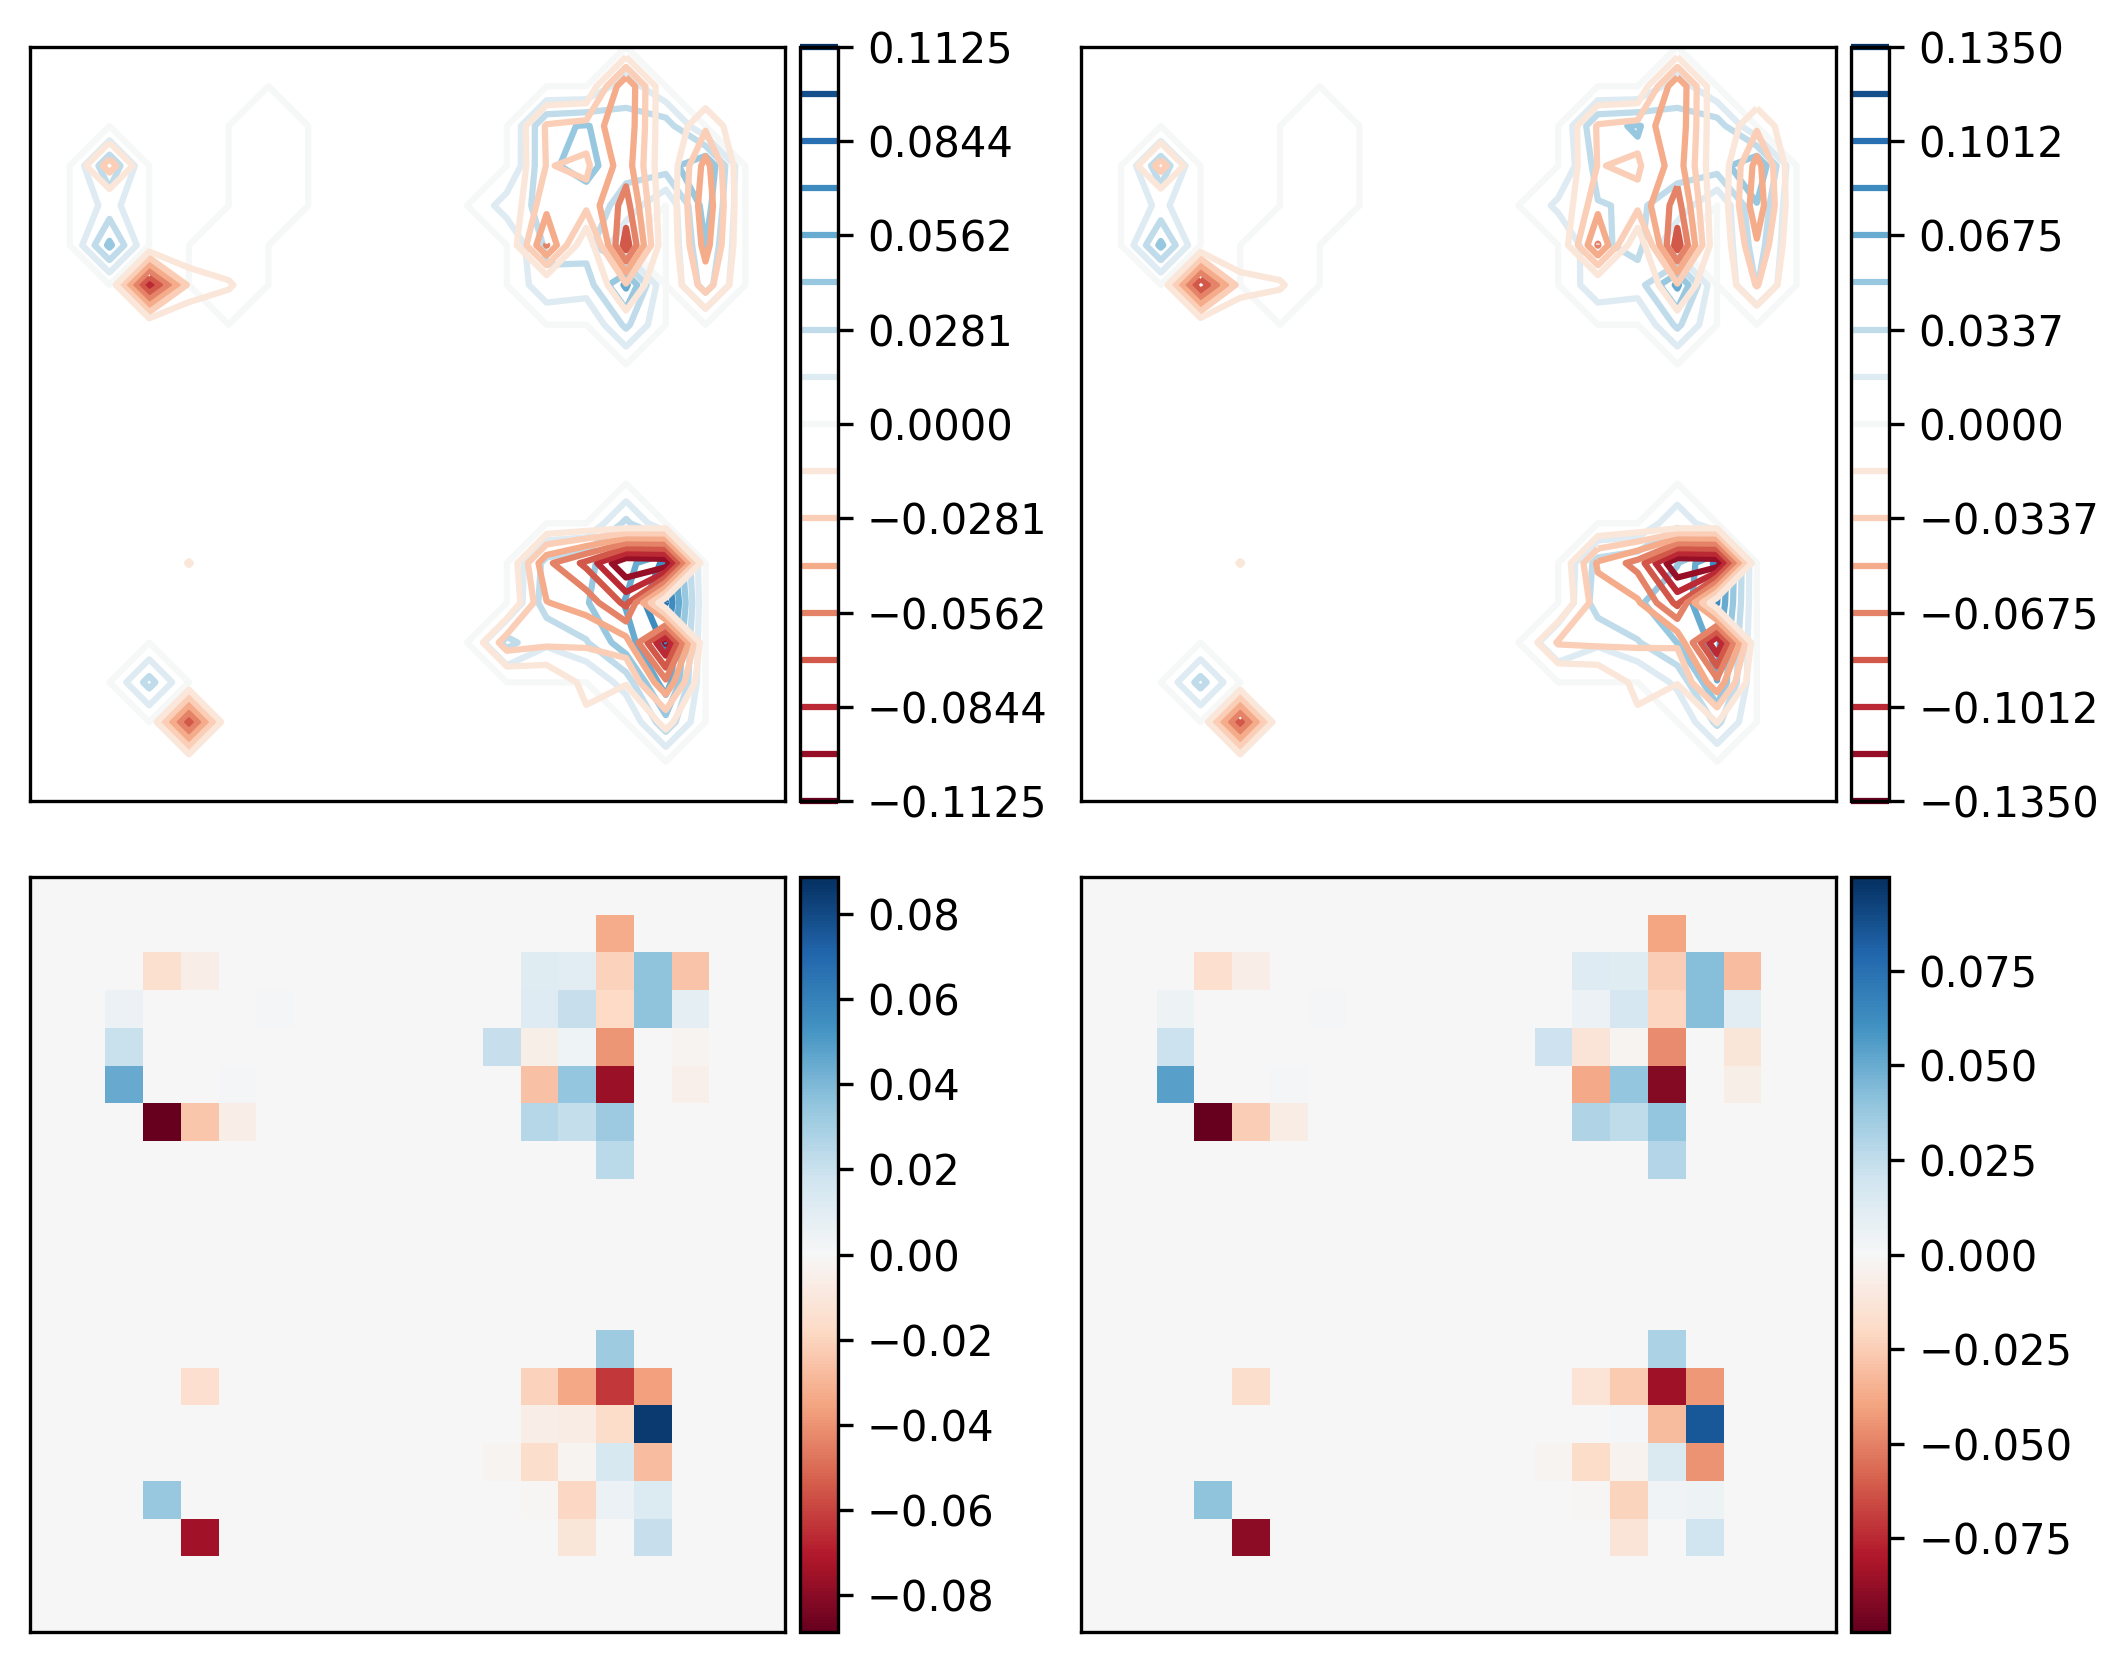

In [8]:
with np.load(data_dir+'/layer4/v{v}/y_v{v}.npz'.format(v=Version)) as data:
    print(list(data.keys()))
    print(data['W'].reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn).shape)
    print(data['l4'].reshape(N4pop,N4,N4).shape)
    wff = data['W'].reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)[:,:,[4,-5],:,:,:][:,:,:,[4,-5],:,:]
    rf = np.sum(wff[:,0]-wff[:,1],axis=(-4,-3))

fig,axs = plt.subplots(2,2,figsize=(8,7),dpi=300)
fig.subplots_adjust(hspace = .1, wspace=.3)
for i in range(2):
    doubcontbar(axs[0,i],np.sum(wff[i,0],axis=(-4,-3)),-np.sum(wff[i,1],axis=(-4,-3)),
                cmap='RdBu',levels=np.linspace(-np.max(np.abs(wff[i])),np.max(np.abs(wff[i])),17))

for i in range(2):
    imshowbar(axs[1,i],rf[i],cmap='RdBu',vmin=-np.max(np.abs(rf[i])),vmax=np.max(np.abs(rf[i])))